In [120]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/DAVE3625/DAVE3625-24H/main/Lab2/data/Titanic.csv') # index_col=0 means that the first column is the index
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Check for null and NaN values

In [122]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Filling NaN's
As we cab see there are 263 passengers without an Age registered. We need to fill in Age, Fare and Embarked values with sensible values.

This differs from dataset to dataset. 

In [123]:
# Check numerical differences of mean and median:
print('Mean Age: %.2f' %(df['Age'].mean(skipna=True))) # Checks mean and skips NaN values
print('Median Age: %.2f' %(df['Age'].median(skipna=True))) # Checks median and skips NaN values

print('Mean Fare: %.2f' %(df['Fare'].mean(skipna=True)))
print('Median Fare: %.2f' %(df['Fare'].median(skipna=True)))

print('Mode of Embarked: ', df['Embarked'].mode()[0]) # Mode of Embarked

# %.2f means that it will print the number with 2 decimals

Mean Age: 29.88
Median Age: 28.00
Mean Fare: 33.30
Median Fare: 14.45
Mode of Embarked:  S


In [124]:
# Fill in the NaN values for Age
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) # The [0] is used to get the first value of the mode


df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

### Fixing Cabin NaN's
To fix the cabin NaN's, we can't just fill in with a dummy value. This is because machine-learning prefers to have numerical or boolean values. TO achieve this we can make a new column:
Cabin = True/False and set all NaN values to False, and all other to True

In [125]:
df["HasCabin"] = ~(df.Cabin.isnull())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


## Adding a feature:
Extracting title (Mr/Mrs/Miss) from each person and adding a new column "Title"
Current Syntax is LastName, Title., RestOfName

In [126]:
lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1) 
# This regex means that it will search for a space, then a capital letter and then one or more small letters and then a dot

<function __main__.<lambda>(x)>

In [127]:
# To add this to a new column:
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [128]:
# To see how many unique titles there are:
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [129]:
# Can replace Mlle and Ms with Miss, and Mme with Mrs
df["Title"] = df["Title"].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"})
df["Title"].value_counts()

Title
Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [130]:
# And all the unique values can be placed in a list "Unique":
df["Title"] = df["Title"].replace(["Don", "Lady", "Sir", "Countess", "Capt", "Jonkheer", "Dona", "Dr", "Rev", "Col", "Major"], "Unique")
df["Title"].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Unique     29
Name: count, dtype: int64

/var/folders/2d/t3zkm6xd1lnf95yjng8kfs8h0000gn/T/ipykernel_94276/3856461436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data=df, palette='deep')


<Axes: xlabel='Title', ylabel='count'>

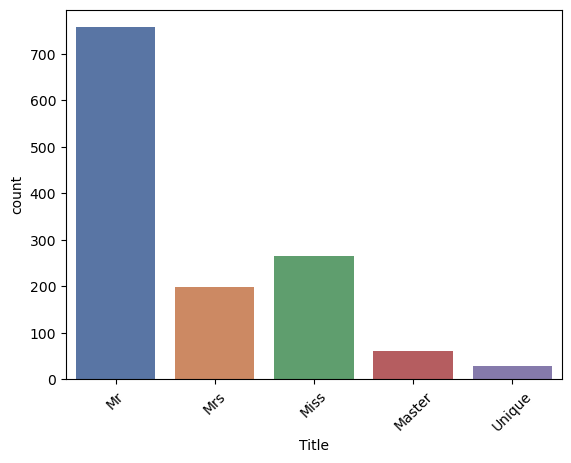

In [131]:
sns.countplot(x='Title', data=df) # Seaborn countplot
plt.xticks(rotation=45) # Rotate the x-axis labels
# To change color:
sns.countplot(x='Title', data=df, palette='deep')

## Convert Age and Fare into Categorical Data:
Here we use pandas qcut function

In [132]:
df["CatAge"] = pd.qcut(df["Age"], q=4, labels=False) # qcut is used to quantile-based discretization function
# q=4 means that it will be divided into 4 quantiles
# labels=False means that it will return only the quantile numbers without the actual values

df["CatFare"] = pd.qcut(df["Fare"], q=4, labels=False)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


## Convert dataframe to binary data
To train a dataset easily we want the data to be numerical. To achieve this we need to drop columns that don't make sense converting to a numerical value. 

In this case we will drop Name, Ticket, Fare and Cabin (Not 100% sure why we drop Fare)


In [133]:
df = df.drop(["Age", "Name", "Ticket", "Cabin", "Fare"], axis=1) # Drop the columns Name, Ticket, Cabin and Fare
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,0.0,3,male,1,0,S,False,Mr,0,0
1,2,1.0,1,female,1,0,C,True,Mrs,3,3
2,3,1.0,3,female,0,0,S,False,Miss,1,1
3,4,1.0,1,female,1,0,S,True,Mrs,2,3
4,5,0.0,3,male,0,0,S,False,Mr,2,1


In [134]:
# To convert the categorical variables into numerical:
df_dum = pd.get_dummies(df, drop_first=True) # This will convert categorical variables into dummy/indicator variables
df_dum.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [135]:
df_dum.to_csv('data/TitanicCleaned.csv', index=False) # Save the cleaned data to a new csv file